Author: Niamh Hogan

# Knock airport Weather Plots

Plot:

- The temperature  
- The mean temperature each day  
- The mean temperature for each month  

- The Windspeed (data missing from this column)  
- The rolling windspeed (over 24 hours)  
- The max windspeed for each day  
- The monthly mean of the daily max windspeeds (nasty section)


In [80]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Variables in dataset
date:  -  Date and Time (utc)  
rain:  -  Precipitation Amount (mm)  
temp:  -  Air Temperature (C)  
wetb:  -  Wet Bulb Temperature (C)  
dewpt: -  Dew Point Temperature (C)  
rhum:  -  Relative Humidity (%)  
vappr: -  Vapour Pressure (hPa)  
msl:   -  Mean Sea Level Pressure (hPa)  
wdsp:  -  Mean Wind Speed (knot)  
wddir: -  Predominant Wind Direction (degree)  
ww:    -  Synop code for Present Weather  
w:     -  Synop code for Past Weather  
sun:   -  Sunshine duration (hours)  
vis:   -  Visibility (m)  
clht:  -  Cloud height (100's of ft) - 999 if none   
clamt: -  Cloud amount  
ind:   -  Indicator

## Step 1: Clean Data

In [81]:
# Read in csv file from url via pandas
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, low_memory=False)
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


In [82]:
df['date']

0         10-apr-1996 14:00
1         31-jul-1996 08:00
2         31-jul-1996 09:00
3         31-jul-1996 10:00
4         31-jul-1996 11:00
                ...        
256429    31-oct-2025 20:00
256430    31-oct-2025 21:00
256431    31-oct-2025 22:00
256432    31-oct-2025 23:00
256433    01-nov-2025 00:00
Name: date, Length: 256434, dtype: object

In [83]:
# convert date to datetime
df['date'] = pd.to_datetime(df['date'])
df['date']

C:\Users\hniam\AppData\Local\Temp\ipykernel_24176\1203770891.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
256429   2025-10-31 20:00:00
256430   2025-10-31 21:00:00
256431   2025-10-31 22:00:00
256432   2025-10-31 23:00:00
256433   2025-11-01 00:00:00
Name: date, Length: 256434, dtype: datetime64[ns]

In [84]:
# set datetime as index
df.set_index('date', inplace=True)
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7


In [85]:
# handling missing vlaues

## Temperature plot

<Axes: xlabel='date', ylabel='temp'>

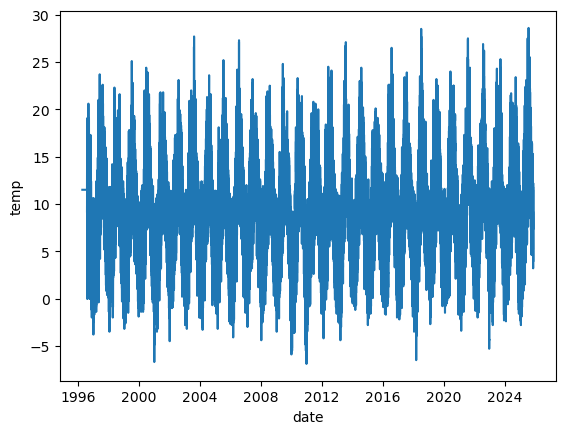

In [86]:
# temperature plot 1996-2025
sns.lineplot(data=df, x='date', y='temp')

<Axes: xlabel='date', ylabel='temp'>

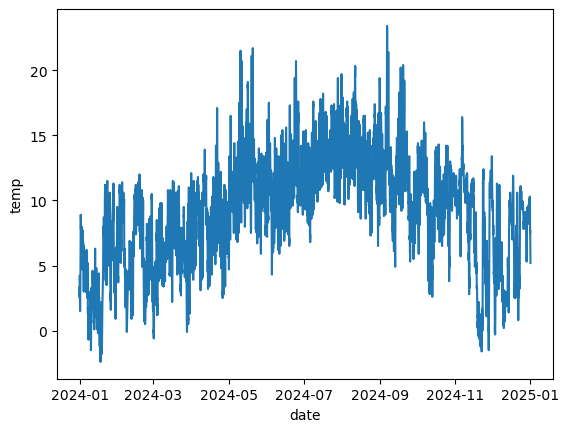

In [87]:
# temperature plot over one year 2024-2025
dateFrom = "01/01/2024 00:00"
dateTo = "01/01/2025 00:00"
sns.lineplot(data=df.loc[dateFrom:dateTo], x="date", y="temp")

## Plot for mean temp each day 

In [88]:
# 1996 - 2025

In [89]:
# over 1 year 2024-2025

## Plot mean temp for each month

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

In [90]:
# 1996 - 2025
df["temp"].resample("MS").mean()

date
1996-04-01    11.500000
1996-05-01          NaN
1996-06-01          NaN
1996-07-01    12.650000
1996-08-01    12.946909
                ...    
2025-07-01    15.068280
2025-08-01    15.178495
2025-09-01    11.368056
2025-10-01     9.900134
2025-11-01     7.400000
Freq: MS, Name: temp, Length: 356, dtype: float64

In [91]:
# over 1 year 2024-2025